# Import Libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
# disable tensorflow log level infos
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # show only errors

import sys
import pandas as pd

if '../../../../notebooks/' not in sys.path:
    sys.path.append('../../../../notebooks/')
if 'src' not in sys.path:
    sys.path.insert(0, 'src')

import utils.constants as cts

from data_loaders.data_loader import DLName
from gt_loaders.gt_names import GTName
from exp_runner import ExperimentRunner
from base.benchmark_dataset import BenchmarkDataset
from base.model_evaluator import DataSource, DataPredSelection
from base.base_models import BaseModel
from base.optimizers import Optimizer
from m_utils.mtl_approach import MTLApproach
from m_utils.nas_mtl_approach import NAS_MTLApproach
from m_utils.constants import ICAO_REQ, MNIST_TASK

 ==> Restrict GPU memory growth: True


# Start Network runner

In [3]:
kwargs = { 
    'use_neptune': False,
    'exp_params' : {
        'name': 'neural_arch_search',
        'description': 'NAS Approach 2 with FVC-ICAO dataset with 50 trials and patience and 5 child epochs',
        'tags': ['nas', 'nas_approach_2', 'fvc', '5_child_epochs'],
        'src_files': ["src"]
    },
    'properties': {
        'approach': NAS_MTLApproach.APPROACH_2,
        'benchmarking': {
            'use_benchmark_data': True,
            'benchmark_dataset': BenchmarkDataset.MNIST,
            'tasks': list(MNIST_TASK)
        },
        'icao_data': {
            'icao_gt': {
                'use_gt_data': False,
                'gt_names': {
                    'train_validation': [],
                    'test': [],
                    'train_validation_test': [GTName.FVC]
                },
            },
            'icao_dl': {
                'use_dl_data': False,
                'tagger_model': None
            },
            'reqs': list(ICAO_REQ),
            'aligned': False
        },
        'balance_input_data': False,
        'train_model': True,
        'save_trained_model': True,
        'exec_nas': True,
        'orig_model_experiment_id': '',
        'sample_training_data': False,
        'sample_prop': 1.0
    },
    'net_train_params': {
        'base_model': BaseModel.MOBILENET_V2,
        'batch_size': 32,
        'n_epochs': 50,
        'early_stopping': 5,
        'learning_rate': 1e-3,
        'optimizer': Optimizer.ADAMAX,
        'dropout': 0.3
    },
    'nas_params': {
        'max_blocks_per_branch': 5,
        'n_child_epochs': 2,
        'controller_epochs': 10,
        'controller_batch_size': 32,
        'n_trials': 5
    }
}

runner = ExperimentRunner(**kwargs)

-------------------- Init ExperimentRunner -------------------
---------------------------
Parent Process ID: 108392
Process ID: 108909
---------------------------
-----
Use Neptune:  False
-----
-------------------
Args: 
{'exp_params': {'description': 'NAS Approach 2 with FVC-ICAO dataset with 50 '
                               'trials and patience and 5 child epochs',
                'name': 'neural_arch_search',
                'src_files': ['src'],
                'tags': ['nas', 'nas_approach_2', 'fvc', '5_child_epochs']},
 'nas_params': {'controller_batch_size': 32,
                'controller_epochs': 10,
                'max_blocks_per_branch': 5,
                'n_child_epochs': 2,
                'n_trials': 5},
 'net_train_params': {'base_model': <BaseModel.MOBILENET_V2: {'name': 'mobilnet_v2', 'target_size': (224, 224), 'prep_function': <function preprocess_input at 0x7f6dd9364f70>}>,
                      'batch_size': 32,
                      'dropout': 0.3,
         

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


# Load Data

In [4]:
runner.load_training_data()

-------------------- load training data -------------------
Loading data
TrainData.shape: (48000, 11)
ValidationData.shape: (12000, 11)
TestData.shape: (10000, 11)
Data loaded


In [5]:
runner.train_data.head()

,img_name,n_0,n_1,n_2,n_3,n_4,n_5,n_6,n_7,n_8,n_9
0,/home/guilherme/data1/Dropbox/Link to Desktop/...,0,0,0,0,1,0,0,0,0,0
1,/home/guilherme/data1/Dropbox/Link to Desktop/...,1,0,0,0,0,0,0,0,0,0
2,/home/guilherme/data1/Dropbox/Link to Desktop/...,0,1,0,0,0,0,0,0,0,0
3,/home/guilherme/data1/Dropbox/Link to Desktop/...,0,0,0,0,0,0,0,1,0,0
4,/home/guilherme/data1/Dropbox/Link to Desktop/...,0,0,0,0,0,0,0,0,1,0


# <font color='red'>Producing Fake Data</font>

# Data Generators

In [6]:
runner.setup_data_generators()

-------------------- setup data generators -------------------
Starting data generators
Found 48000 validated image filenames.
Found 12000 validated image filenames.
Found 10000 validated image filenames.
TOTAL: 70000

Logging class indices
 .. MTL model not logging class indices!

Logging class labels
 COMPLIANT label: 1
 NON_COMPLIANT label: 0
 DUMMY label: -1
 DUMMY_CLS label: 2
 NO_ANSWER label: -99


# Setup Experiment

In [7]:
runner.setup_experiment()

-------------------- create experiment -------------------
Not using Neptune


# Labels Distribution

In [8]:
%%capture
runner.summary_labels_dist()

# Neural Architecture Search

In [9]:
runner.run_neural_architeture_search()

-------------------- run neural architecture search -------------------
Executing neural architectural search
  Memory reseted

==================== STARTING NEW TRIAL ====================
 selecting new config...
  Memory is empty
 controller_pred: [[0.48599398 0.18880536 0.17966609 0.14553456]]


 ------ Training 1 | Config: {'n_denses_0': 3, 'n_denses_1': 1, 'n_denses_2': 1, 'n_denses_3': 1} -----

Creating model...
Model created
Training MOBILENET_V2 network
 .. Not fine tuning base model...
  .. Total params: 3,087,444
  .. Trainable params: 829,460
  .. Non-trainable params: 2,257,984

Epoch 00001: val_loss improved from inf to 0.01596, saving model to training_ckpt/best_model.hdf5


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '



Epoch 00002: val_loss improved from 0.01596 to 0.01362, saving model to training_ckpt/best_model.hdf5
..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 22ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00540 | EER_interp: 0.00520 | ACC: 0.99460
  Task  1: n_1             | EER_mean: 0.00220 | EER_interp: 0.00200 | ACC: 0.99810
  Task  2: n_2             | EER_mean: 0.00250 | EER_interp: 0.00260 | ACC: 0.99740
  Task  3: n_3             | EER_mean: 0.00470 | EER_interp: 0.00480 | ACC: 0.99520
  Task  4: n_4             | EER_mean: 0.00340 | EER_interp: 0.00260 | ACC: 0.99800
  Task  5: n_5             | EER_mean: 0.00250 | EER_interp: 0.00260 | ACC: 0.99750
  Task  6: n_6             | EER_mean: 0.00420 | EER_interp: 0.00400 | ACC: 0.99620
  Task  7: n_7             | EER_mean: 0.00290 | EER_interp: 0.00300 | ACC: 0.99710
  Task  8: n_8             | EER_mean: 0.00340 | EER_in

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '



Epoch 00002: val_loss improved from 0.02490 to 0.00649, saving model to training_ckpt/best_model.hdf5
..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 22ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00090 | EER_interp: 0.00060 | ACC: 0.99970
  Task  1: n_1             | EER_mean: 0.00140 | EER_interp: 0.00140 | ACC: 0.99860
  Task  2: n_2             | EER_mean: 0.00250 | EER_interp: 0.00250 | ACC: 0.99750
  Task  3: n_3             | EER_mean: 0.00290 | EER_interp: 0.00300 | ACC: 0.99720
  Task  4: n_4             | EER_mean: 0.00340 | EER_interp: 0.00220 | ACC: 0.99880
  Task  5: n_5             | EER_mean: 0.00180 | EER_interp: 0.00180 | ACC: 0.99820
  Task  6: n_6             | EER_mean: 0.00220 | EER_interp: 0.00230 | ACC: 0.99780
  Task  7: n_7             | EER_mean: 0.00250 | EER_interp: 0.00240 | ACC: 0.99750
  Task  8: n_8             | EER_mean: 0.00340 | EER_in

KeyboardInterrupt: 

# Create Model with Best Config Found

In [10]:
runner.create_model()

-------------------- create model -------------------
Creating model...
Model created


# Visualize Model

In [11]:
runner.visualize_model(outfile_path=f"figs/nas/nas_model_approach_2.png")

-------------------- vizualize model -------------------


In [12]:
%%capture
runner.model_summary()

# Training Model

In [13]:
runner.train_model()

-------------------- train model -------------------
Training MOBILENET_V2 network
 .. Not fine tuning base model...
  .. Total params: 4,242,286
  .. Trainable params: 1,984,302
  .. Non-trainable params: 2,257,984
Epoch 1/50


154/154 [==============================] - 349s 2s/step - loss: 0.5600 - background_loss: 0.4131 - close_loss: 0.4523 - ink_mark_loss: 0.3770 - pixelation_loss: 0.2140 - washed_out_loss: 0.0522 - blurred_loss: 0.1457 - sh_head_loss: 0.0659 - mouth_loss: 0.0244 - veil_loss: 0.2889 - red_eyes_loss: 0.2649 - flash_lenses_loss: 0.0437 - dark_glasses_loss: 0.4419 - l_away_loss: 0.2091 - frame_eyes_loss: 0.4335 - hair_eyes_loss: 0.3546 - eyes_closed_loss: 0.2220 - frames_heavy_loss: 0.0092 - sh_face_loss: 0.4731 - skin_tone_loss: 0.0398 - light_loss: 0.2195 - hat_loss: 0.2626 - rotation_loss: 0.3667 - reflection_loss: 0.2266 - background_accuracy: 0.8184 - close_accuracy: 0.7918 - ink_mark_accuracy: 0.8243 - pixelation_accuracy: 0.9142 - washed_out_accuracy: 0.9870 - blurred_accuracy: 0.9489 - sh_head_accuracy: 0.9748 - mouth_accuracy: 0.9915 - veil_accuracy: 0.8709 - red_eyes_accuracy: 0.8912 - flash_lenses_accuracy: 0.9862 - dark_glasses_accuracy: 0.7861 - l_away_accuracy: 0.9280 - frame_e

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/50
154/154 [==============================] - 338s 2s/step - loss: 0.3804 - background_loss: 0.2819 - close_loss: 0.3949 - ink_mark_loss: 0.2827 - pixelation_loss: 0.0927 - washed_out_loss: 0.0423 - blurred_loss: 0.0525 - sh_head_loss: 0.0201 - mouth_loss: 0.0076 - veil_loss: 0.1816 - red_eyes_loss: 0.1635 - flash_lenses_loss: 0.0070 - dark_glasses_loss: 0.3292 - l_away_loss: 0.1433 - frame_eyes_loss: 0.3482 - hair_eyes_loss: 0.2702 - eyes_closed_loss: 0.1441 - frames_heavy_loss: 7.2436e-05 - sh_face_loss: 0.3799 - skin_tone_loss: 0.0166 - light_loss: 0.1609 - hat_loss: 0.1576 - rotation_loss: 0.2192 - reflection_loss: 0.1082 - background_accuracy: 0.8900 - close_accuracy: 0.8360 - ink_mark_accuracy: 0.8799 - pixelation_accuracy: 0.9704 - washed_out_accuracy: 0.9892 - blurred_accuracy: 0.9825 - sh_head_accuracy: 0.9929 - mouth_accuracy: 0.9972 - veil_accuracy: 0.9217 - red_eyes_accuracy: 0.9359 - flash_lenses_accuracy: 0.9984 - dark_glasses_accuracy: 0.8563 - l_away_accuracy: 0

# Plots

-------------------- draw training history -------------------


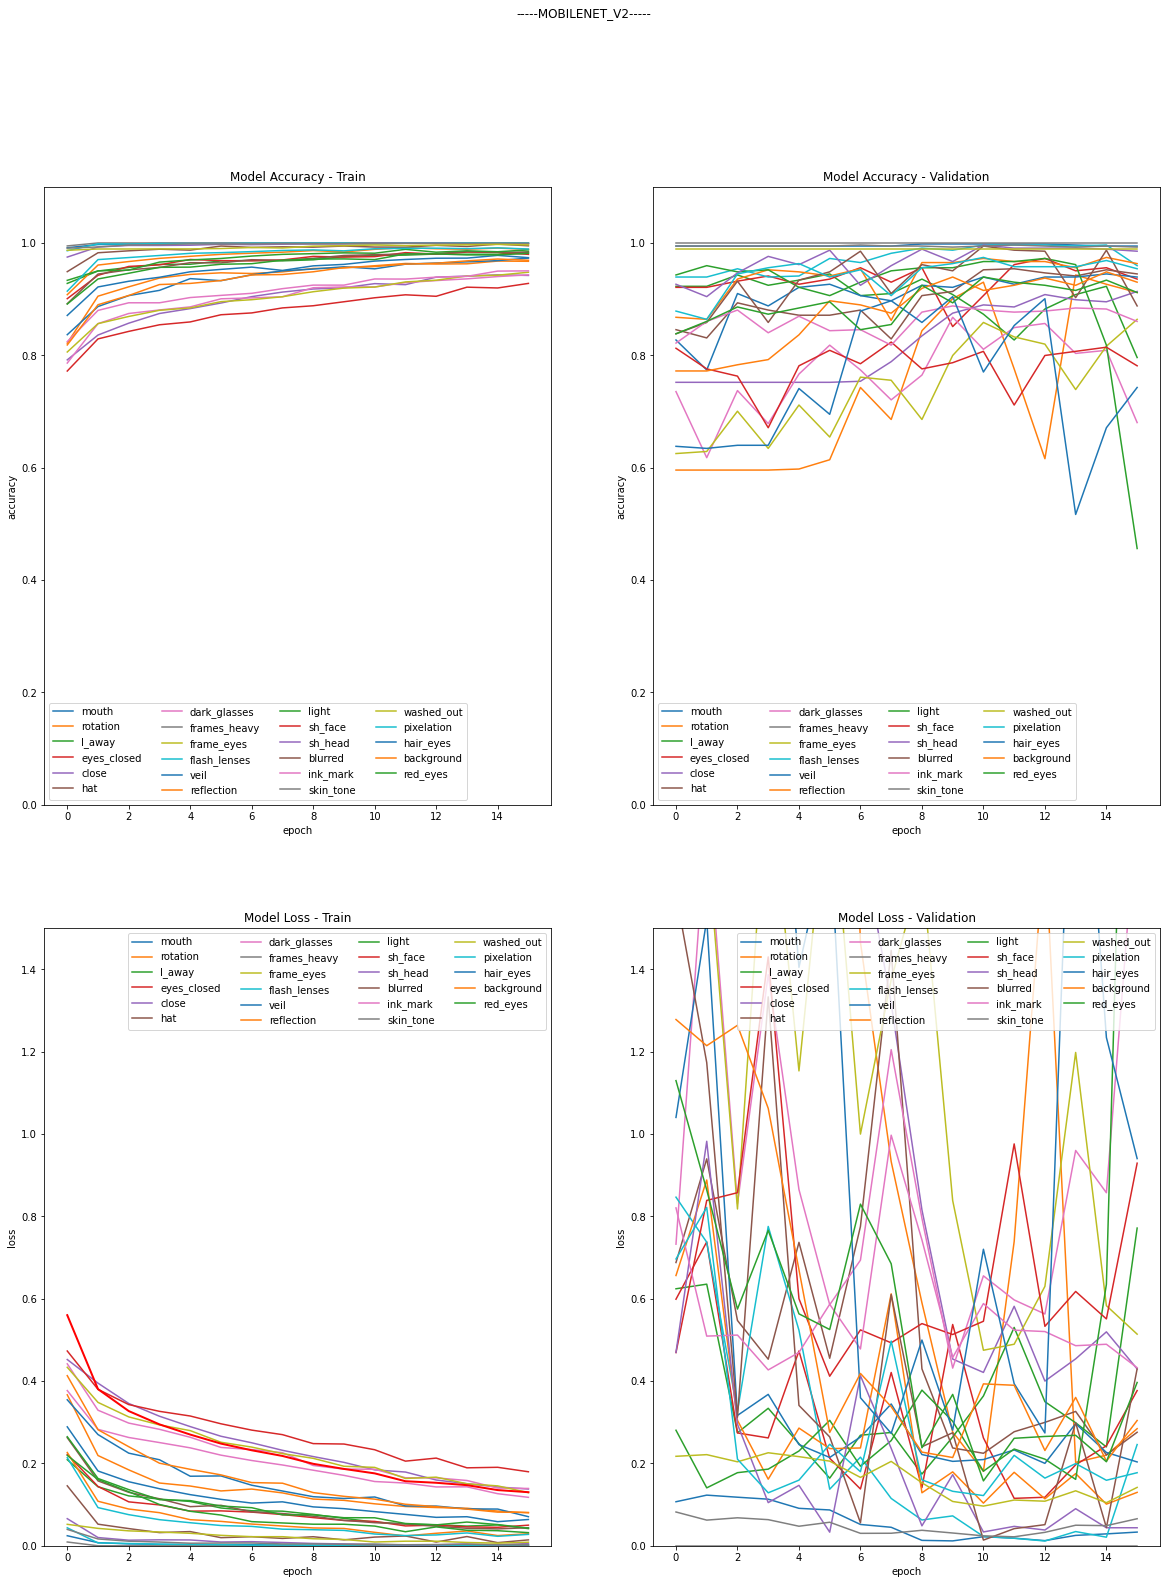

In [14]:
runner.draw_training_history()

# Load Best Model

In [15]:
runner.load_best_model()

-------------------- load best model -------------------
..Loading best model
..Checkpoint weights loaded


# Saving Trained Model

In [16]:
runner.save_model()

-------------------- save model -------------------
Saving model


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: trained_model/assets
..Model saved
...Model path: trained_model
Saving model to neptune
 ..Uploading file trained_model.zip
Model saved into Neptune
Saving process finished


# Test Trained Model

## Validation Split

In [17]:
runner.set_model_evaluator_data_src(DataSource.VALIDATION)
runner.test_model(verbose=False)

Testing Trained Model
Predicting labels....
18/18 [==============================] - 32s 2s/step
Prediction finished!


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:803: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn("No negative samples in y_true, "


  Task  0: mouth           | EER_mean: 0.10950 | EER_interp: 0.10600 | ACC: 0.89210
  Task  1: rotation        | EER_mean: 0.16830 | EER_interp: 0.16810 | ACC: 0.83180
  Task  2: l_away          | EER_mean: 0.16360 | EER_interp: 0.16420 | ACC: 0.83550
  Task  3: eyes_closed     | EER_mean: 0.05660 | EER_interp: 0.05660 | ACC: 0.94330
  Task  4: close           | EER_mean: 0.06650 | EER_interp: 0.00000 | ACC: 0.93420
  Task  5: hat             | EER_mean: 0.00220 | EER_interp: 0.00000 | ACC: 0.99820
  Task  6: dark_glasses    | EER_mean: 0.01920 | EER_interp: 0.02380 | ACC: 0.97260
  Task  7: frames_heavy    | EER_mean: 0.01290 | EER_interp: 0.00000 | ACC: 0.98720
  Task  8: frame_eyes      | EER_mean: 0.06080 | EER_interp: 0.05670 | ACC: 0.94150
  Task  9: flash_lenses    | EER_mean: 0.06220 | EER_interp: 0.06200 | ACC: 0.93780
  Task 10: veil            | EER_mean: 0.00190 | EER_interp: 0.00000 | ACC: 0.99820
  Task 11: reflection      | EER_mean: 0.14540 | EER_interp: 0.14630 | ACC: 

## Test Split

In [18]:
runner.set_model_evaluator_data_src(DataSource.TEST)
runner.test_model(verbose=False)

Testing Trained Model
Predicting labels....
9/9 [==============================] - 21s 3s/step
Prediction finished!


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/scipy/interpolate/interpolate.py:630: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/scipy/interpolate/interpolate.py:633: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


  Task  0: mouth           | EER_mean: 0.12330 | EER_interp: 0.13140 | ACC: 0.86460
  Task  1: rotation        | EER_mean: 0.19230 | EER_interp: 0.18990 | ACC: 0.80900
  Task  2: l_away          | EER_mean: 0.13930 | EER_interp: 0.13860 | ACC: 0.86110
  Task  3: eyes_closed     | EER_mean: 0.03430 | EER_interp: 0.02620 | ACC: 0.96880
  Task  4: close           | EER_mean: 0.17430 | EER_interp: 0.00000 | ACC: 0.81600
  Task  5: hat             | EER_mean: 0.01960 | EER_interp: 0.01820 | ACC: 0.98260
  Task  6: dark_glasses    | EER_mean: 0.03230 | EER_interp: 0.03360 | ACC: 0.96530
  Task  7: frames_heavy    | EER_mean: 0.00000 | EER_interp: 0.00000 | ACC: 0.99310
  Task  8: frame_eyes      | EER_mean: 0.08330 | EER_interp: 0.09070 | ACC: 0.90620
  Task  9: flash_lenses    | EER_mean: 0.05000 | EER_interp: 0.04910 | ACC: 0.95140
  Task 10: veil            | EER_mean: 0.01120 | EER_interp: 0.00000 | ACC: 0.98960
  Task 11: reflection      | EER_mean: 0.17310 | EER_interp: 0.16990 | ACC: 

# Visualize Model Classification

# Finishing Experiment Manager

In [19]:
runner.finish_experiment()

-------------------- finish experiment -------------------
Finishing Neptune


Error occurred during asynchronous operation processing: Value of float attribute cannot be malformed.
Error occurred during asynchronous operation processing: Value of float attribute cannot be malformed.
Error occurred during asynchronous operation processing: Value of float attribute cannot be malformed.
Error occurred during asynchronous operation processing: Value of float attribute cannot be malformed.


# Testing Network Modification

# Test - Customized Loss Function

# Test - 

In [20]:
import tensorflow as tf
import numpy as np

import os
# disable tensorflow log level infos
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # show only errors

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


def __create_rnn_model():
    model = Sequential([
        Dense(4, activation="relu"),
        Dense(64, activation="relu"),
        Dense(4, activation="softmax")
    ])

    model.compile(loss="categorical_crossentropy", optimizer=Adam(), metrics=["accuracy"])

    return model

def __preprocess_config(config):
    return np.linalg.norm(config)
    


np.random.seed(2)

X = np.random.rand(400,4)
y = np.random.rand(400,4)

# X = tf.expand_dims(X, axis=0)
# y = np.expand_dims(y, axis=0)

print(X.shape)
print(y.shape)

X_test = np.random.rand(20,4)
y_test = np.random.rand(20,4)

# X_test = tf.expand_dims(X_test, axis=0)
# y_test = tf.expand_dims(y_test, axis=0)

m = __create_rnn_model()

m.fit(X,y, batch_size=32, epochs=5)

loss, acc = m.evaluate(X_test,y_test, batch_size=32)

print(f'loss: {loss}%')
print(f'acc: {round(acc*100,2)}%')

print(f'prediction: {m.predict(np.array(X_test[0]).reshape(1,4))}')

(400, 4)
(400, 4)
Epoch 1/5
13/13 [==============================] - 0s 2ms/step - loss: 2.8107 - accuracy: 0.2975
Epoch 2/5
13/13 [==============================] - 0s 1ms/step - loss: 2.8058 - accuracy: 0.2975
Epoch 3/5
13/13 [==============================] - 0s 1ms/step - loss: 2.8107 - accuracy: 0.3000
Epoch 4/5
13/13 [==============================] - 0s 1ms/step - loss: 2.8236 - accuracy: 0.3000
Epoch 5/5
1/1 [==============================] - 0s 74ms/step - loss: 2.6880 - accuracy: 0.4000
loss: 2.6879963874816895%
acc: 40.0%
prediction: [[0.16105369 0.20146929 0.290272   0.34720507]]


In [21]:
import sys
import random

from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Model
from tensorflow.keras.layers import Add, Concatenate, Embedding, LSTM, LSTMCell, RNN, Reshape
from tensorflow.keras.layers import Input, Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import losses, metrics
from tensorflow.keras.models import load_model
from tensorflow.keras.initializers import RandomUniform, HeNormal, GlorotNormal

import tensorflow as tf


def get_weight_initializer(initializer=None, seed=None):
    if initializer is None:
        return HeNormal()
    elif initializer == "lstm":
        return RandomUniform(minval=-0.1, maxval=0.1)
    else:
        return GlorotNormal()


def get_weight_regularizer(regularizer=None, rate=1e-4):
    if regularizer is None:
        return regularizers.l2(rate)
    else:
        return regularizer(rate)


class ControllerRNNController(object):
    def __init__(self,
                 controller_network_name,
                 num_nodes,
                 num_opers,
                 input_x,
                 reward=0,
                 temperature=5.0,
                 tanh_constant=2.5,
                 model_file=None,
                 lstm_cell_units=32,
                 baseline_decay=0.999,
                 opt=Adam(learning_rate=0.00035, decay=1e-3, amsgrad=True)):

        self.controller_network_name = controller_network_name
        self.num_nodes = num_nodes
        self.num_opers = num_opers
        self.reward = reward
        self.input_x = input_x
        self.temperature = temperature
        self.tanh_constant = tanh_constant
        self.lstm_cell_units = lstm_cell_units
        self.opt = opt
        self.model_file = model_file

        self.controller_rnn = self.generate_controller_rnn()
        self.baseline = None
        self.baseline_decay = baseline_decay

        #self.graph = tf.get_default_graph()

    def lstm_reshape(self,
                     inputs,
                     name_prefix,
                     index,
                     reshaped_inputs=None,
                     initial=False):
        name_prefix = "{0}_{1}_{2}".format(self.controller_network_name,
                                           name_prefix, index)
        cell = LSTMCell(
            self.lstm_cell_units,
            kernel_initializer=get_weight_initializer(initializer="lstm"),
            recurrent_initializer=get_weight_initializer(initializer="lstm"))
        if initial:
            x = RNN(
                cell,
                return_state=True,
                name="{0}_{1}".format(name_prefix, "lstm"))(inputs)
        else:
            x = RNN(
                cell,
                return_state=True,
                name="{0}_{1}".format(name_prefix, "lstm"))(
                    reshaped_inputs, initial_state=inputs[1:])
        rx = Reshape(
            (-1, self.lstm_cell_units),
            name="{0}_{1}".format(name_prefix, "reshape"))(x[0])
        return x, rx

    def dense_softmax(self, inputs, num_classes, name_prefix, index):
        name_prefix = "{0}_{1}_{2}".format(self.controller_network_name,
                                           name_prefix, index)
        y = Dense(
            num_classes, name="{0}_{1}".format(name_prefix, "dense"))(inputs)
        y = Activation(
            activation="softmax",
            name="{0}_{1}".format(name_prefix, "softmax"))(y)
        return y

    def generate_controller_rnn(self):
        outputs = []
        controller_input = Input(shape=(1, 1,), name="{0}_{1}".format(self.controller_network_name, "input"))

        for i in range(2, self.num_nodes):
            for o in ["inputL", "inputR", "operL", "operR"]:
                if i == 2 and o == "inputL":
                    _x, _rx, _initial = controller_input, None, True
                else:
                    _x, _rx, _initial = x, rx, False

                if o in ["inputL", "inputR"]:
                    _num_classes = i
                else:
                    _num_classes = self.num_opers

                x, rx = self.lstm_reshape(
                    inputs=_x,
                    name_prefix=o,
                    index=i,
                    reshaped_inputs=_rx,
                    initial=_initial)
                y = self.dense_softmax(
                    inputs=x[0],
                    num_classes=_num_classes,
                    name_prefix=o,
                    index=i)
                outputs.append(y)

        controller_rnn = Model(inputs=controller_input, outputs=outputs)

        if self.model_file is not None and os.path.exists(self.model_file):
            controller_rnn.load_weights(self.model_file)
        return controller_rnn

    def compile_controller_rnn(self):
        def _controller_loss(y_true, y_pred):
            if self.baseline is None:
                self.baseline = 0
            else:
                self.baseline -= (1 - self.baseline_decay) * (self.baseline - self.reward)
            return y_pred * (self.reward - self.baseline)

        def _define_loss(controller_loss):
            outputs_loss = {}
            for i in range(2, self.num_nodes):
                outputs_loss["{0}_{1}_{2}_{3}".format(self.controller_network_name, "inputL", i, "softmax")] = controller_loss
                outputs_loss["{0}_{1}_{2}_{3}".format(self.controller_network_name, "inputR", i, "softmax")] = controller_loss
                outputs_loss["{0}_{1}_{2}_{3}".format(self.controller_network_name, "operL", i, "softmax")] = controller_loss
                outputs_loss["{0}_{1}_{2}_{3}".format(self.controller_network_name, "operR", i, "softmax")] = controller_loss
            return outputs_loss

        self.controller_rnn.compile(loss=_define_loss(_controller_loss), optimizer=self.opt)

    def save_model(self):
        self.controller_rnn.save_weights(self.model_file)

    def train_controller_rnn(self,
                             targets,
                             batch_size=1,
                             epochs=50,
                             callbacks=[EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='auto')]):
        #with self.graph.as_default():
        self.compile_controller_rnn()
        self.controller_rnn.fit(
            self.input_x,
            targets,
            epochs=epochs,
            batch_size=batch_size,
            verbose=0)

    def softmax_predict(self):
        #with self.graph.as_default():
        self.compile_controller_rnn()
        return self.controller_rnn.predict(self.input_x)

    def random_sample_softmax(self, controller_pred):
        sample_softmax = []
        for cp in controller_pred:
            cp /= self.temperature
            cp = self.tanh_constant * np.tanh(cp)
            cp = np.exp(cp) / np.sum(np.exp(cp))
            cp = np.array([np.random.multinomial(1, cp[0])])
            sample_softmax.append(cp)
        return sample_softmax

    def convert_pred_to_cell(self, controller_pred):
        cell_pred = {}
        for p in range(2, self.num_nodes):
            pos = list(range((p - 2) * 4, ((p - 2) * 4) + 4))
            cell_pred[p] = {
                "L": {
                    "input_layer": np.argmax(controller_pred[pos[0]]),
                    "oper_id": np.argmax(controller_pred[pos[2]])
                },
                "R": {
                    "input_layer": np.argmax(controller_pred[pos[1]]),
                    "oper_id": np.argmax(controller_pred[pos[3]])
                }
            }
        return cell_pred

    def convert_pred_to_ydict(self, controller_pred):
        ydict = {}
        name_prefix = self.controller_network_name
        for i in range(2, self.num_nodes):
            pos = list(range((i - 2) * 4, ((i - 2) * 4) + 4))
            ydict["{0}_{1}_{2}_{3}".format(name_prefix, "inputL", i, "softmax")] = controller_pred[pos[0]]
            ydict["{0}_{1}_{2}_{3}".format(name_prefix, "inputR", i, "softmax")] = controller_pred[pos[1]]
            ydict["{0}_{1}_{2}_{3}".format(name_prefix, "operL", i, "softmax")] = controller_pred[pos[2]]
            ydict["{0}_{1}_{2}_{3}".format(name_prefix, "operR", i, "softmax")] = controller_pred[pos[3]]
        return ydict


In [22]:
contr = ControllerRNNController("netname", num_nodes=3, num_opers=3, input_x=X)

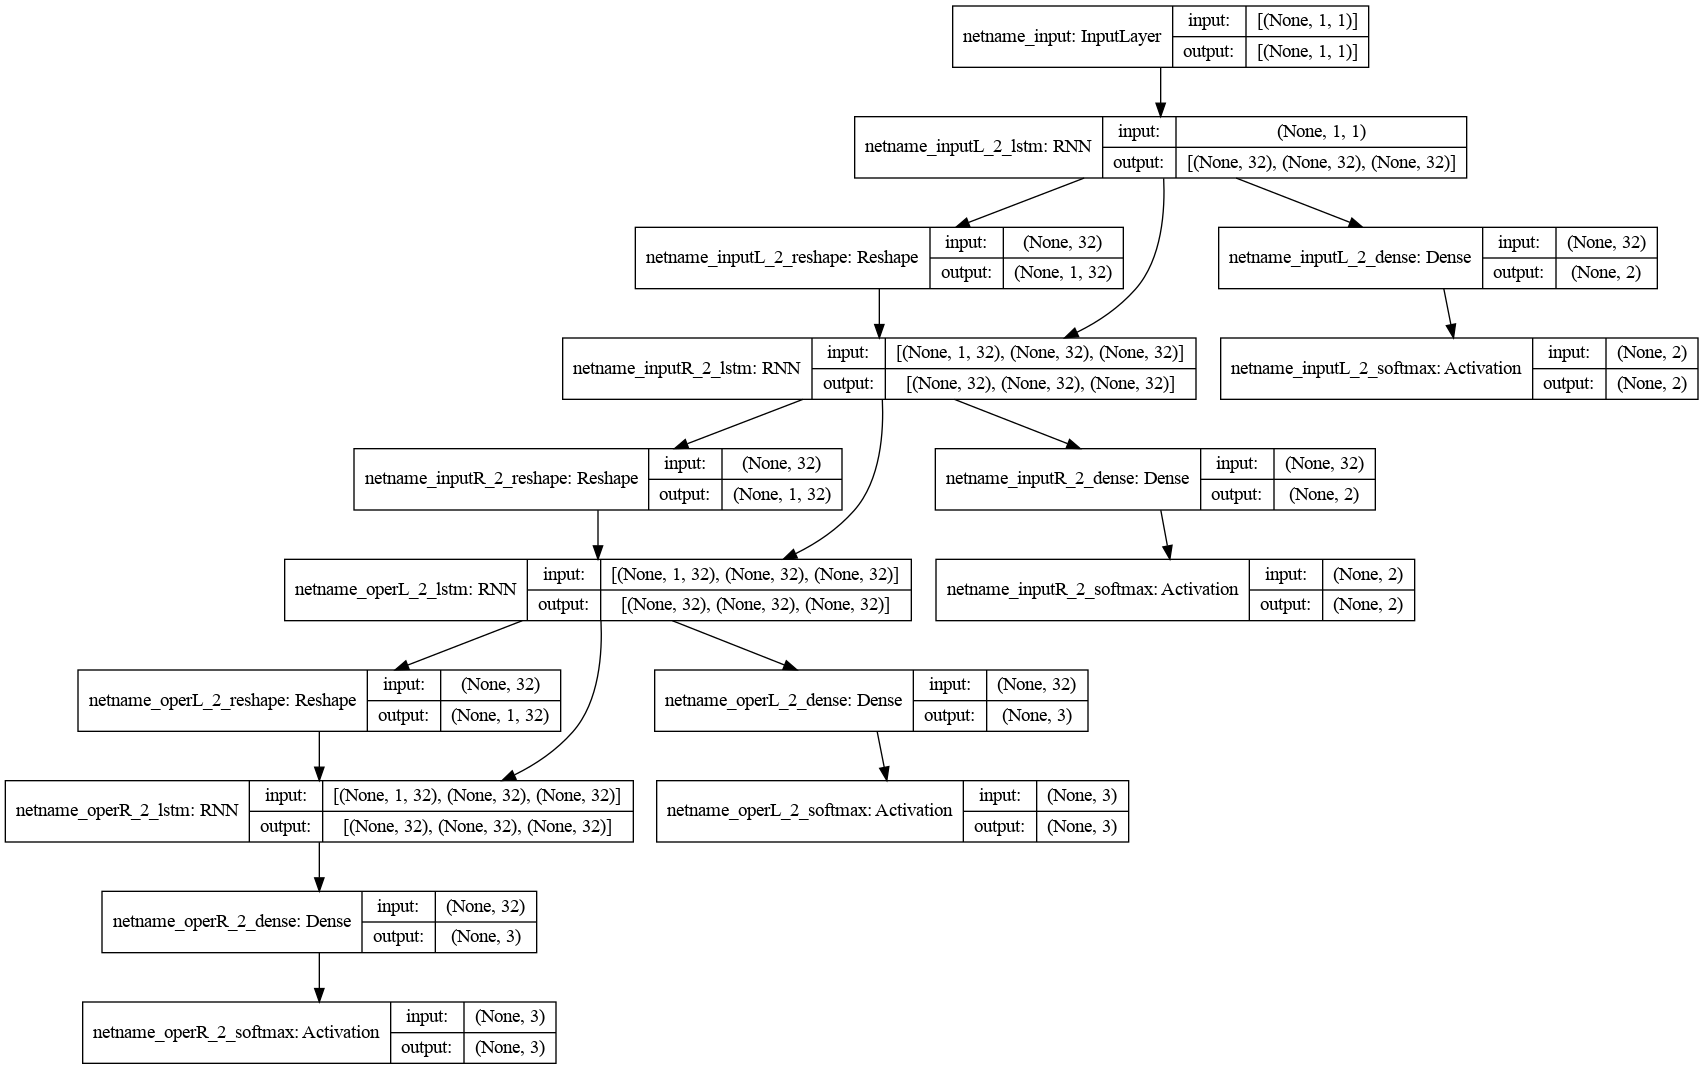

In [23]:
from tensorflow.keras.utils import plot_model

#contr.controller_rnn.summary()
plot_model(contr.controller_rnn, expand_nested=True, show_shapes=True)

# Test LSTM

In [24]:
import tensorflow as tf

import os
# disable tensorflow log level infos
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # show only errors

inputs = tf.random.normal([32, 10, 8])
lstm = tf.keras.layers.LSTM(4, return_sequences=True, return_state=True)

whole_seq_output, final_memory_state, final_carry_state = lstm(inputs)

print(whole_seq_output.shape, final_memory_state.shape, final_carry_state.shape)

(32, 10, 4) (32, 4) (32, 4)
